In [57]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score,mean_absolute_percentage_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge, Lasso
from sklearn.preprocessing import StandardScaler

In [94]:
df= pd.read_csv('stage2.csv', index_col=0)


In [95]:
corr= df.corr()

In [97]:
corr= corr.drop('Year')
corr= corr.drop('Year',axis=1)

In [98]:
col= list(corr.columns)
index= list(corr.index)

In [114]:
for i in col:
    print(i)
    print("----------------------------------\n")
    print(corr[(corr[i]> 0.5) | (corr[i]< -0.5)][i])
    print("\n\n")
    print("----------------------------------")


    
    

Access to electricity (% of population)
----------------------------------

Access to electricity (% of population)                             1.000000
Access to clean fuels for cooking                                   0.863604
Renewable energy share in the total final energy consumption (%)   -0.782574
Name: Access to electricity (% of population), dtype: float64



----------------------------------
Access to clean fuels for cooking
----------------------------------

Access to electricity (% of population)                             0.863604
Access to clean fuels for cooking                                   1.000000
Renewable energy share in the total final energy consumption (%)   -0.791998
Primary energy consumption per capita (kWh/person)                  0.566743
gdp_per_capita                                                      0.526507
Name: Access to clean fuels for cooking, dtype: float64



----------------------------------
Renewable energy share in the total final en

<AxesSubplot:>

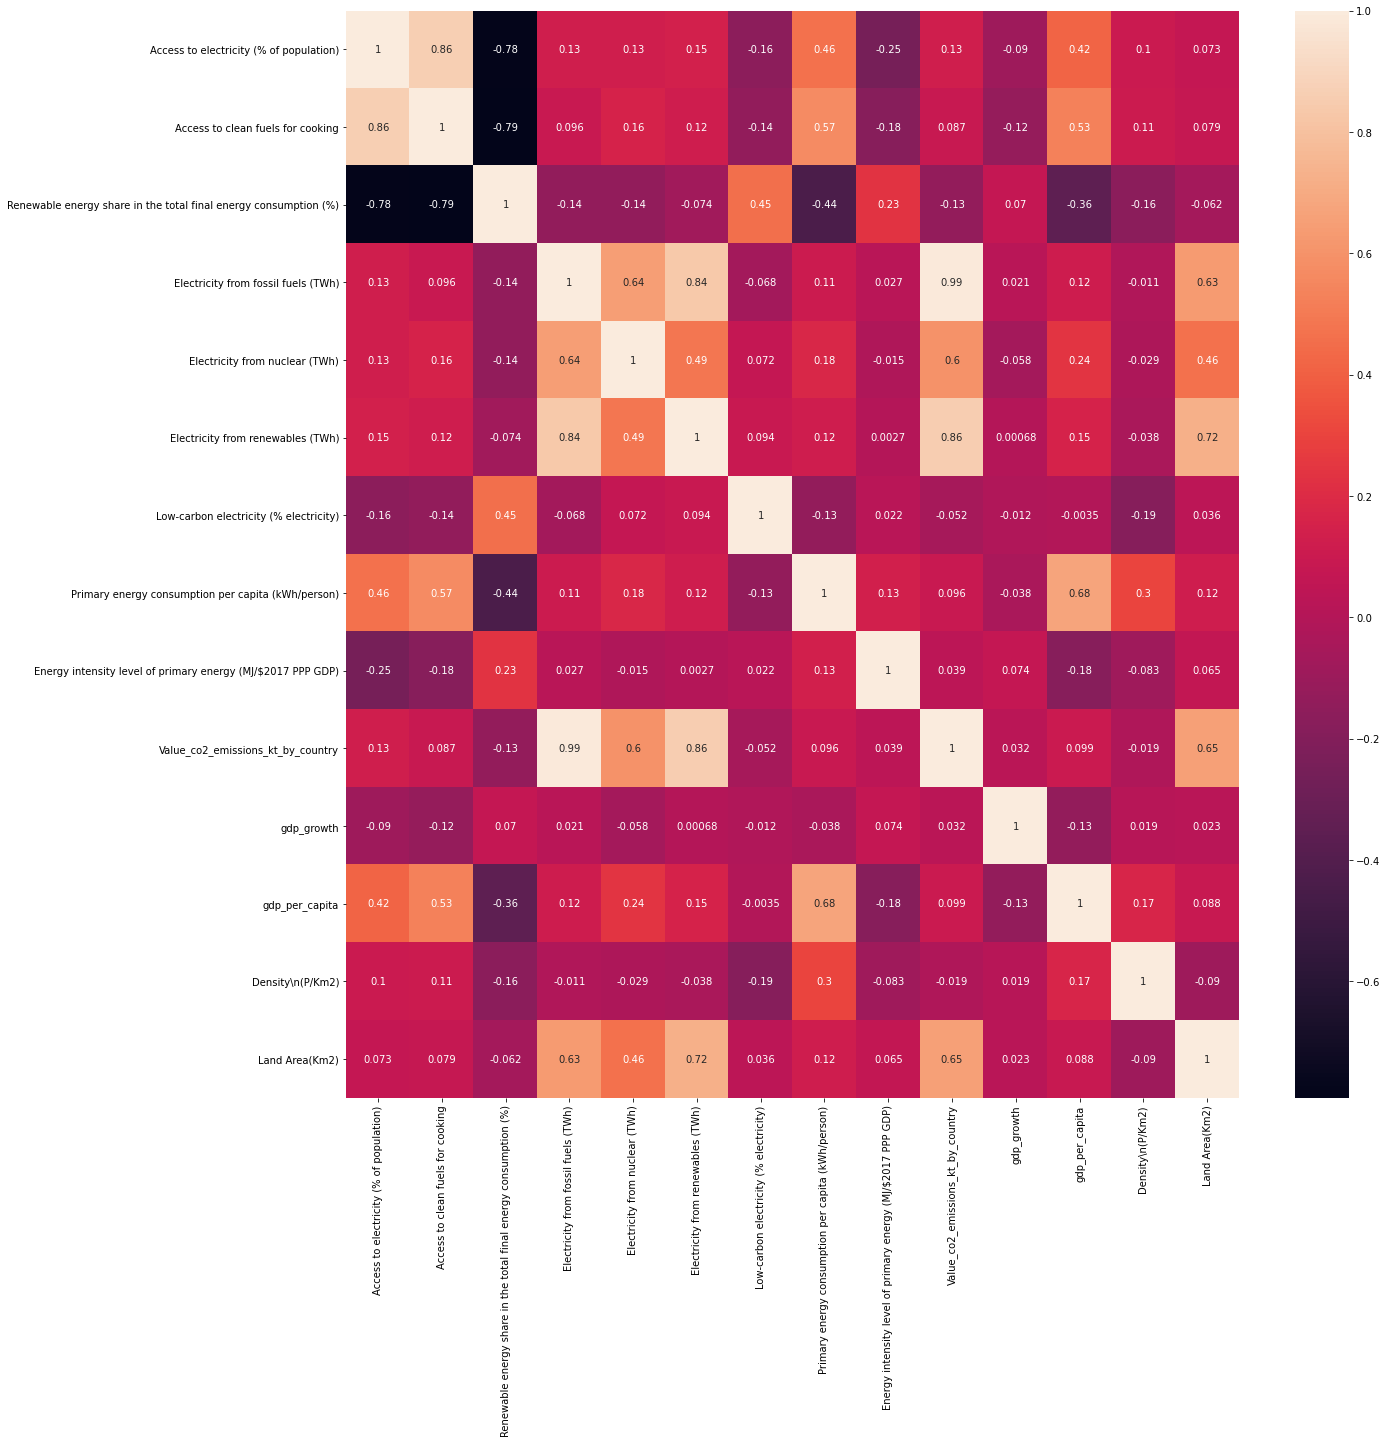

In [117]:
plt.figure(figsize=(20,20))
sns.heatmap(corr,annot= True)

In [127]:
col.remove('Value_co2_emissions_kt_by_country')


ValueError: list.remove(x): x not in list

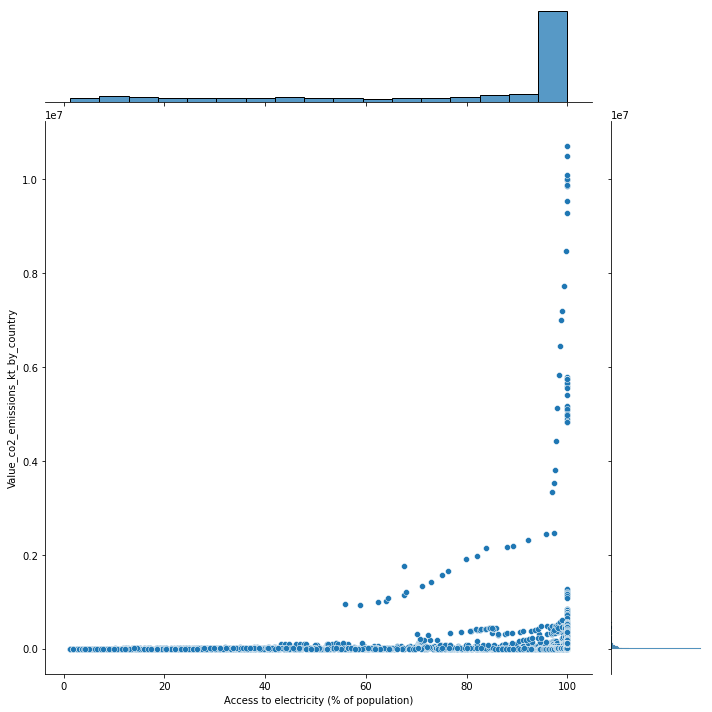

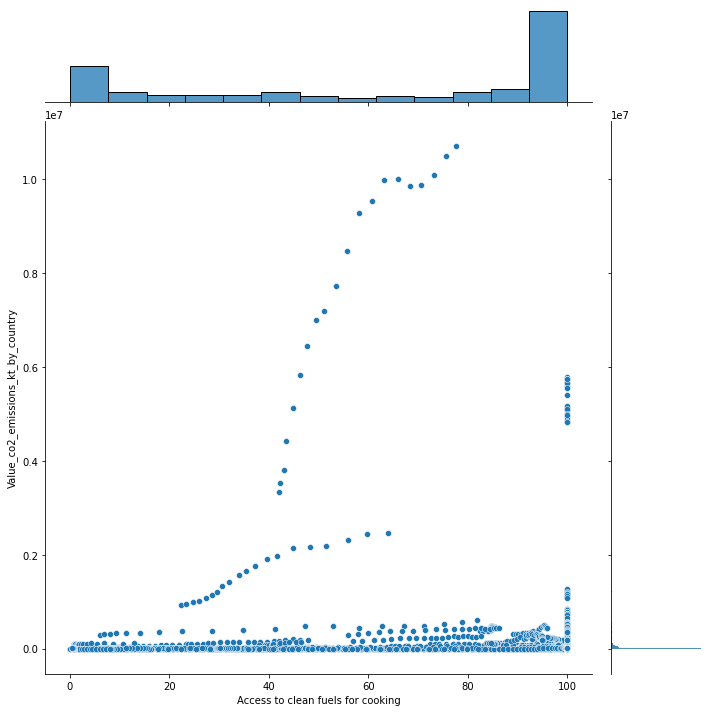

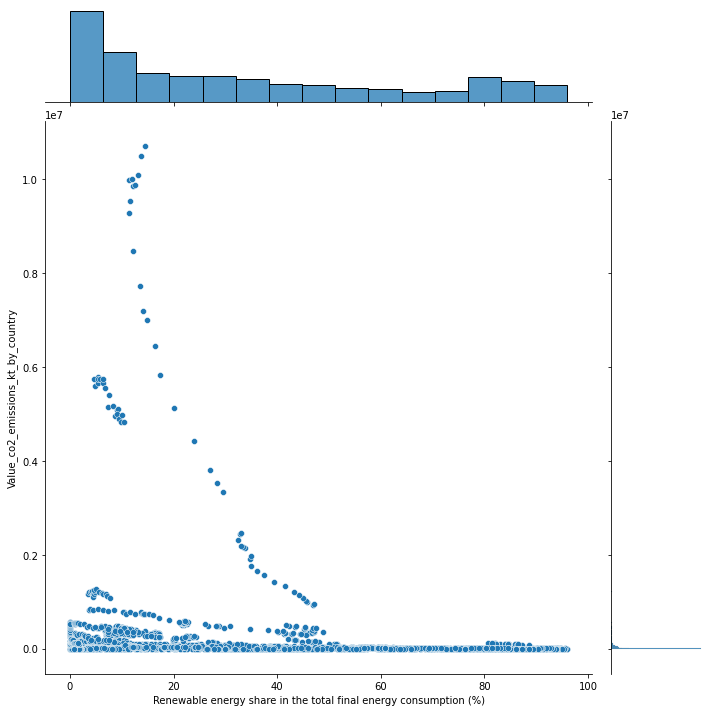

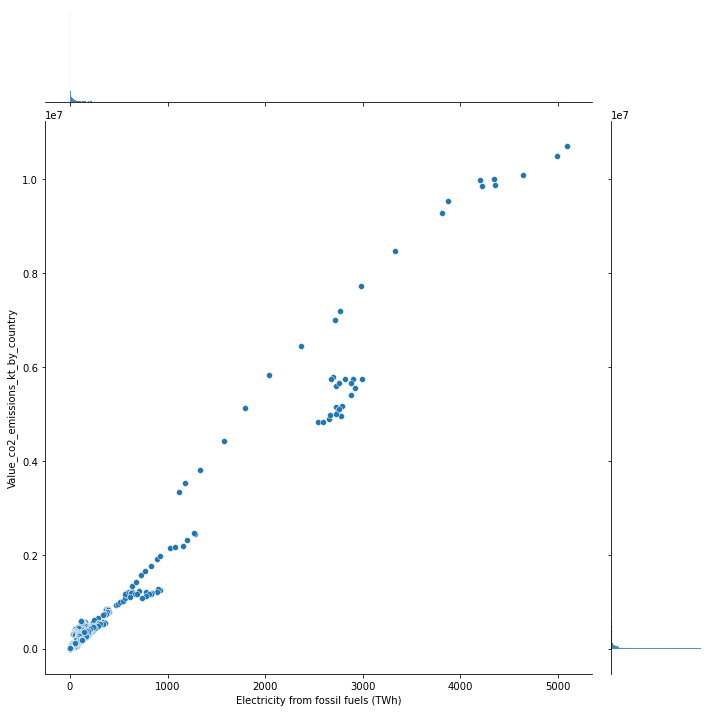

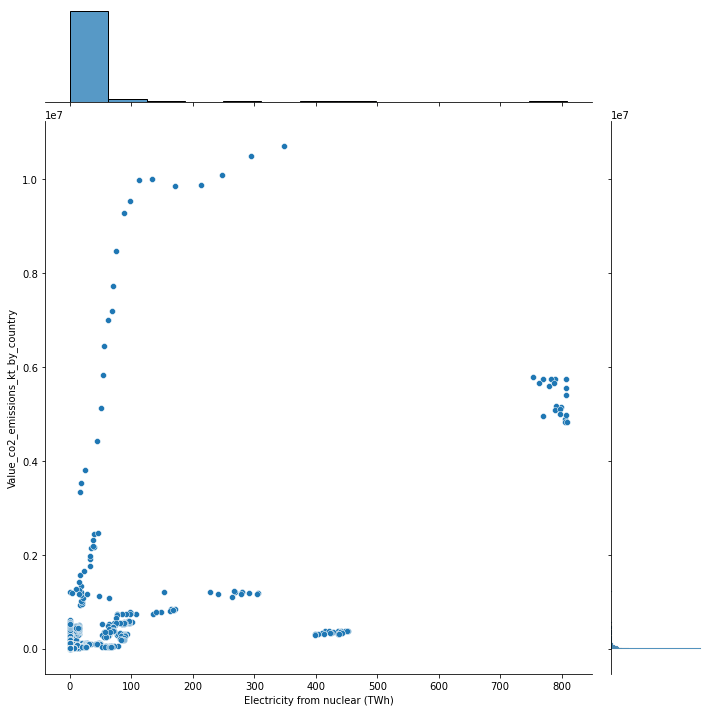

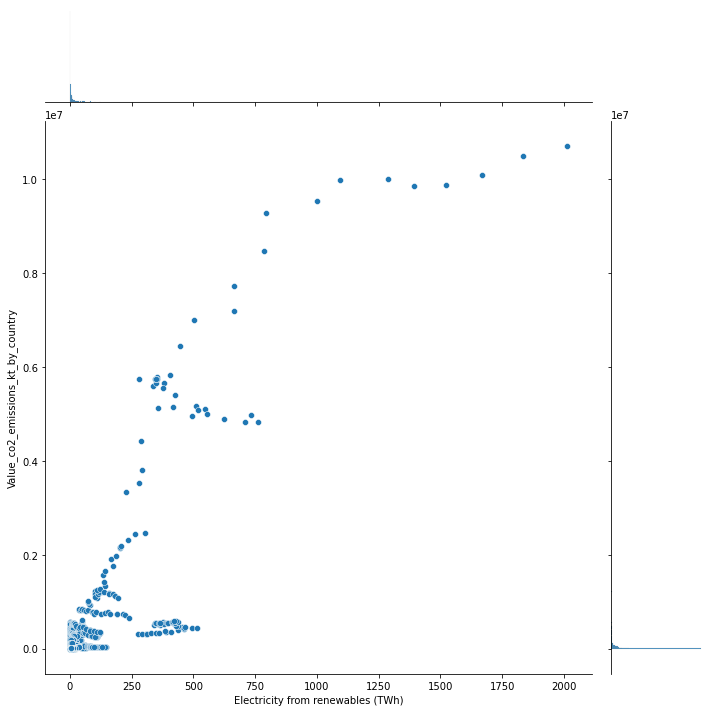

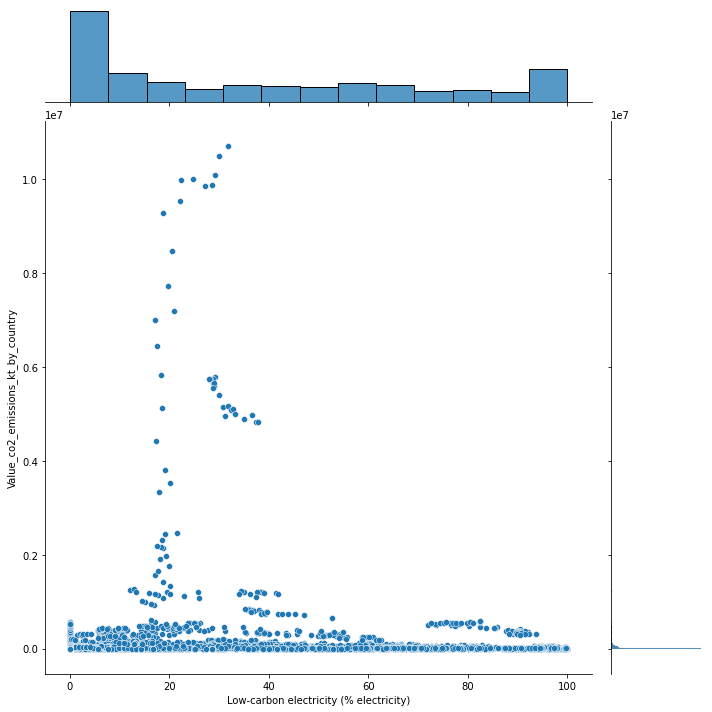

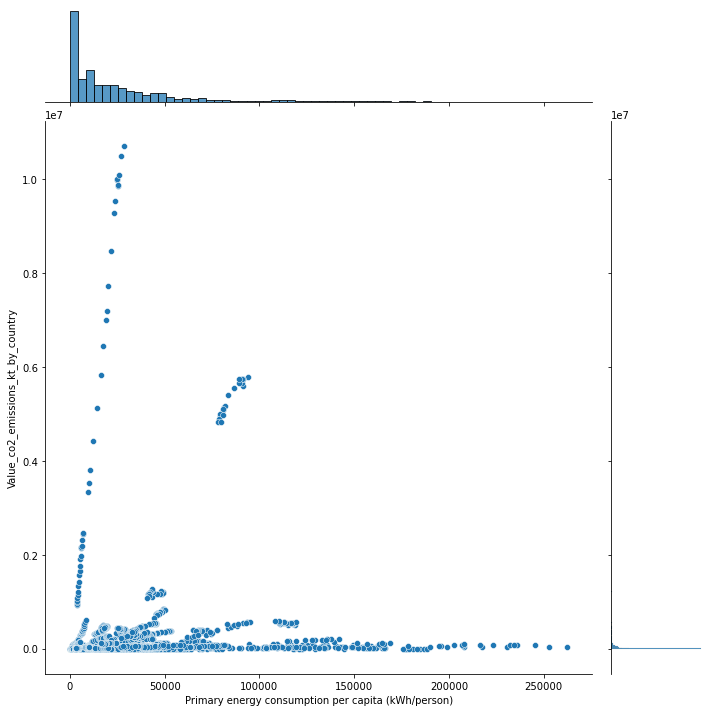

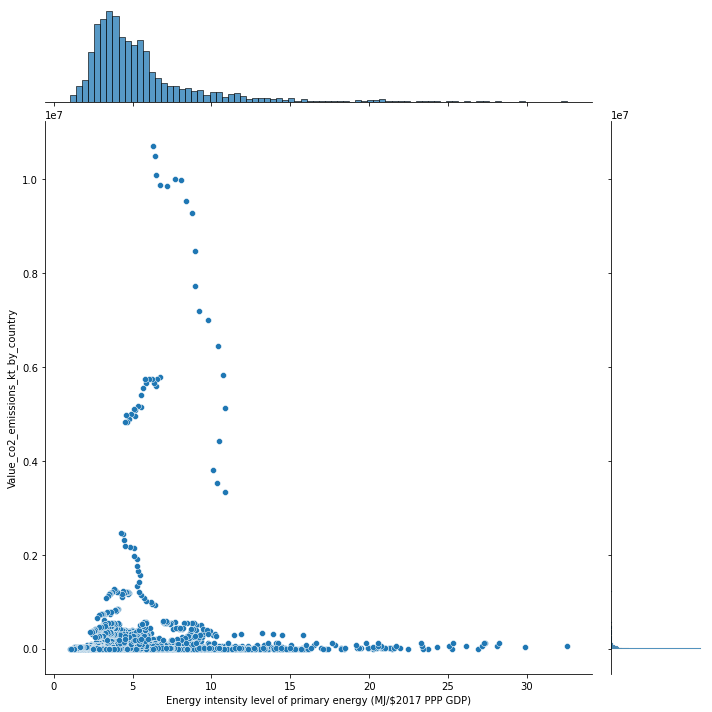

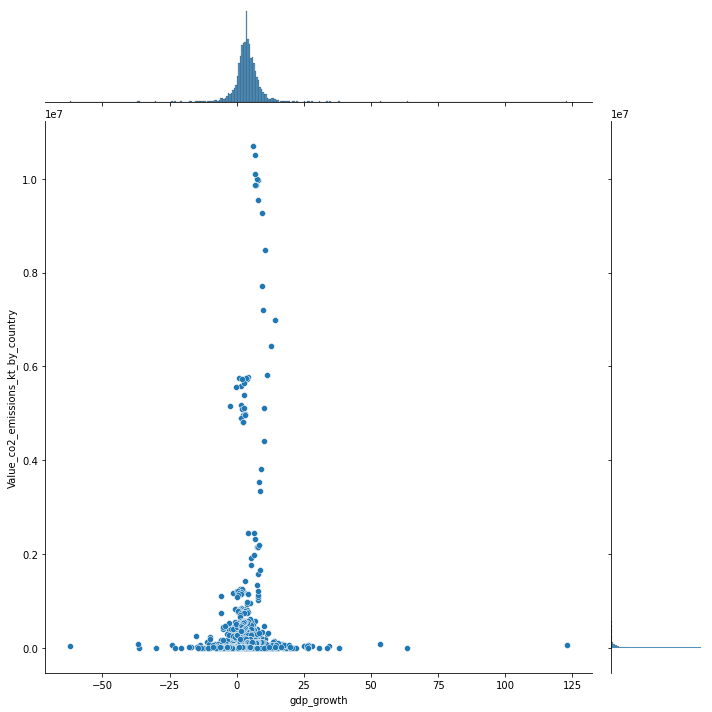

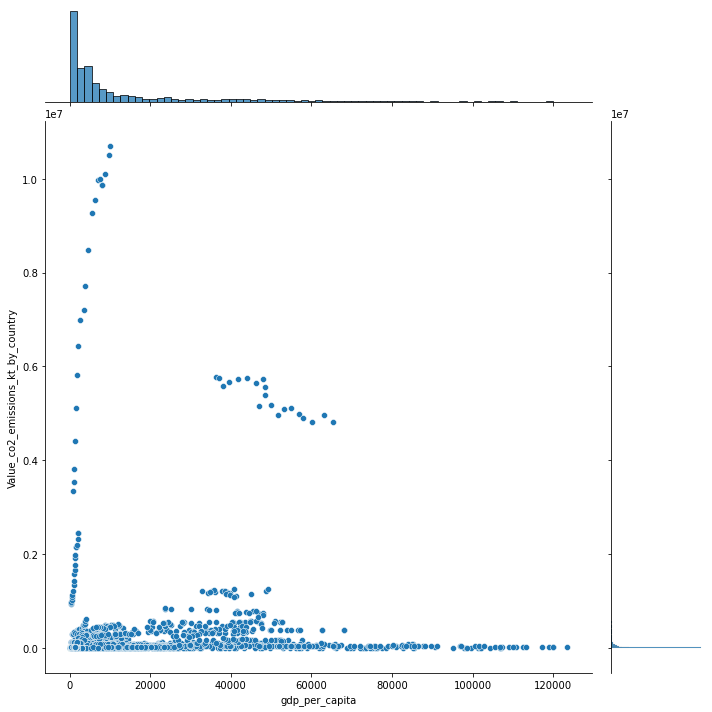

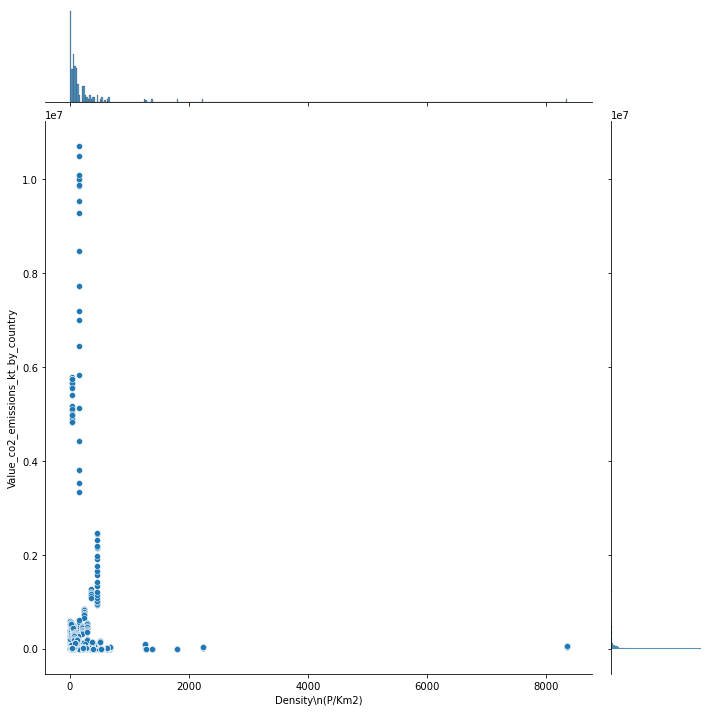

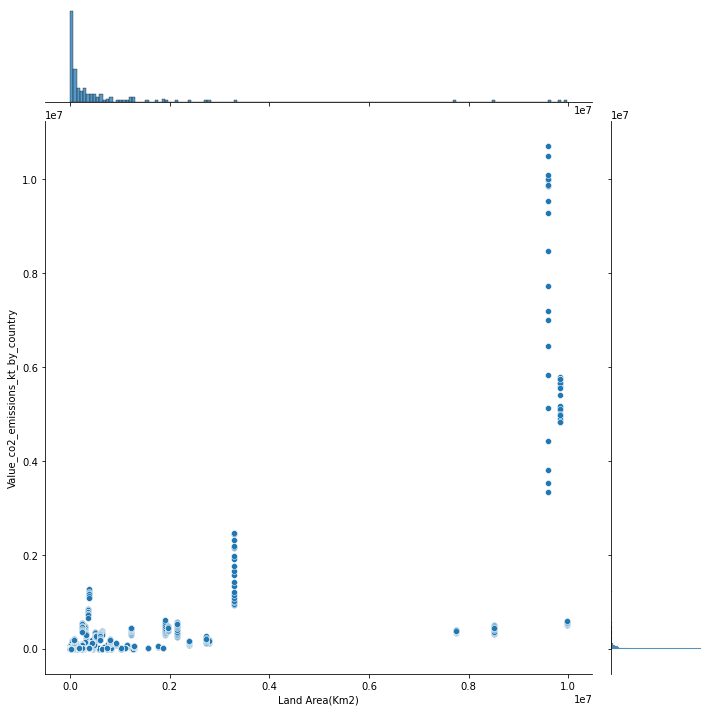

In [129]:
for i in col:
    sns.jointplot(x= i,y='Value_co2_emissions_kt_by_country',data= df,height=10)

Index(['Access to electricity (% of population)',
       'Access to clean fuels for cooking',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)', 'Electricity from nuclear (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)',
       'Energy intensity level of primary energy (MJ/$2017 PPP GDP)',
       'Value_co2_emissions_kt_by_country', 'gdp_growth', 'gdp_per_capita',
       'Density\n(P/Km2)', 'Land Area(Km2)'],
      dtype='object')

In [59]:
China.corr()['Value_co2_emissions_kt_by_country'].sort_values()

Energy intensity level of primary energy (MJ/$2017 PPP GDP)        -0.906249
Renewable energy share in the total final energy consumption (%)   -0.905177
gdp_growth                                                         -0.491856
Low-carbon electricity (% electricity)                              0.753371
Electricity from nuclear (TWh)                                      0.786816
Electricity from renewables (TWh)                                   0.893955
Access to clean fuels for cooking                                   0.934564
gdp_per_capita                                                      0.944273
Electricity from fossil fuels (TWh)                                 0.988776
Access to electricity (% of population)                             0.990871
Primary energy consumption per capita (kWh/person)                  0.996374
Value_co2_emissions_kt_by_country                                   1.000000
Density\n(P/Km2)                                                         NaN

In [60]:
X= China.drop(['Value_co2_emissions_kt_by_country','Density\\n(P/Km2)','Land Area(Km2)'],axis=1)
y= China['Value_co2_emissions_kt_by_country']

In [61]:







# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)







In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [63]:
# Perform Ridge Regression
ridge_model = Ridge(alpha=1.0)  # You can adjust the alpha value
ridge_model.fit(X_train_scaled, y_train)
ridge_predictions = ridge_model.predict(X_test_scaled)
ridge_mse = mean_squared_error(y_test, ridge_predictions)
print("Ridge MSE:", ridge_mse)

Ridge MSE: 24921316058.89015


In [64]:
# Perform Lasso Regression
lasso_model = Lasso(alpha=1.0)  # You can adjust the alpha value
lasso_model.fit(X_train_scaled, y_train)
lasso_predictions = lasso_model.predict(X_test_scaled)
lasso_mse = mean_squared_error(y_test, lasso_predictions)
print("Lasso MSE:", lasso_mse)


Lasso MSE: 5687839418.518448


In [65]:
# Print coefficients for Ridge and Lasso models
print("Ridge Coefficients:", ridge_model.coef_)
print("Lasso Coefficients:", lasso_model.coef_)

Ridge Coefficients: [ 444788.11083186  228446.33954921 -417889.44870854  394977.60161584
  -38156.9376017   129544.05764449 -126893.69980919  386637.46235146
  -81538.18965879  -32326.90660292  303558.31277422]
Lasso Coefficients: [ 413630.40082391  922966.70493421    7229.12029262  986139.28539041
 -324477.86156926  -31472.30384298 -127682.78323075  914837.49931946
  238581.46057267  -68601.80682196 -441140.55058944]


In [92]:
import pandas as pd

# Create a sample DataFrame
data = {'row1': [1, 2, 3], 'row2': [4, 5, 6], 'row3': [7, 8, 9]}
df = pd.DataFrame(data, index=['row1', 'row2', 'row3'])

# Display the original DataFrame
print("Original DataFrame:")
print(df)

# Delete row with the same name as a column using one line
row_to_delete = 'row2'
df = df.drop(row_to_delete)

# Display the DataFrame after deletion
print("\nDataFrame after deleting row with the same name as a column:")
print(df)


Original DataFrame:
      row1  row2  row3
row1     1     4     7
row2     2     5     8
row3     3     6     9

DataFrame after deleting row with the same name as a column:
      row1  row2  row3
row1     1     4     7
row3     3     6     9
